# Exercício 2 Regressão Logística

Exercício no qual utilizei regressão logística para plotar gráficos e prever a precisão dos jogadores Messi e Cristiano Ronaldo durante o período em que ambos estavam atuando nos gramados espanhóis, entre as temporadas 2009-10 e 2017-18. As competições utilizadas nesta atividade foram La Liga e Champions League, com o Dataset sendo retirado do site Kaggle.

Descrição dos dados utilizados:

* 'Season': Temporada.
* 'Player': Jogador.
* 'Liga_Goals': Gols em La Liga.
* 'Liga_Asts': Assistências em La Liga.
* 'Liga_Aps': Jogos em La Liga.
* 'Liga_Mins': Minutos em La Liga.
* 'CL_Goals': Gols na Champions League.
* 'CL_Asts': Assistências na Champions League.
* 'CL_Aps': Jogos na Champions League.
* 'CL_Mins': Minutos na Champions League.

In [ ]:
pip install plotly --upgrade 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

In [ ]:
ad_data = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/A1/MessiRonaldo.csv')

In [ ]:
ad_data.head(20)

,Season,Player,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins
0,2017-18,Messi,34,12,36,2996,6,2,10,783
1,2017-18,Ronaldo,26,5,27,2297,15,3,13,1170
2,2016-17,Messi,37,9,34,2832,11,2,9,810
3,2016-17,Ronaldo,25,6,29,2544,12,5,13,1200
4,2015-16,Messi,26,16,33,2729,6,1,7,630
5,2015-16,Ronaldo,35,11,36,3184,16,4,12,1109
6,2014-15,Messi,43,21,38,3375,10,6,13,1145
7,2014-15,Ronaldo,48,16,35,3096,10,4,12,1064
8,2013-14,Messi,28,12,31,2498,8,1,7,630
9,2013-14,Ronaldo,31,11,30,2537,17,6,11,991


In [ ]:
ad_data.info()

In [ ]:
ad_data.describe()

,Liga_Goals,Liga_Asts,Liga_Aps,Liga_Mins,CL_Goals,CL_Asts,CL_Aps,CL_Mins
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,35.555556,13.055556,33.388889,2840.833333,10.444444,3.388889,10.722222,936.777778
std,8.226372,4.491459,3.201817,321.289177,3.467873,2.226548,2.191039,208.341223
min,25.000000,5.000000,27.000000,2297.000000,6.000000,0.000000,6.000000,450.000000
25%,28.750000,11.000000,31.250000,2565.250000,8.000000,2.000000,10.000000,814.250000
50%,34.000000,12.500000,34.000000,2836.500000,10.000000,3.500000,11.000000,990.500000
75%,42.250000,15.500000,35.750000,3071.000000,12.000000,4.000000,12.000000,1076.000000
max,50.000000,21.000000,38.000000,3375.000000,17.000000,9.000000,13.000000,1200.000000


## Gráficos


### Histograma baseado nas patidas disputadas em La Liga

(array([1., 2., 1., 1., 1., 2., 3., 2., 2., 3.]),
 array([27. , 28.1, 29.2, 30.3, 31.4, 32.5, 33.6, 34.7, 35.8, 36.9, 38. ]),
 <a list of 10 Patch objects>)

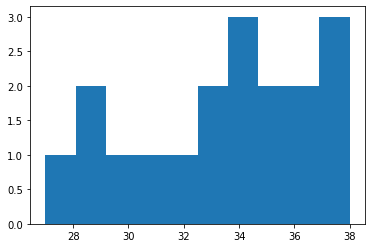

In [ ]:
plt.hist(x = ad_data["Liga_Aps"])

### Joinplot gols na Champions League por temporada

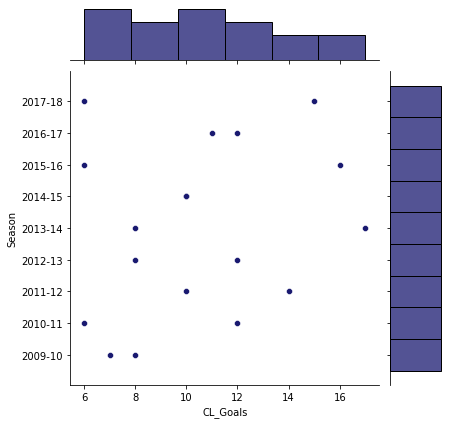

In [ ]:
sns.jointplot(data=ad_data, y="Season", x="CL_Goals", color="midnightblue")

### Joinplot gols em La Liga por temporada

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


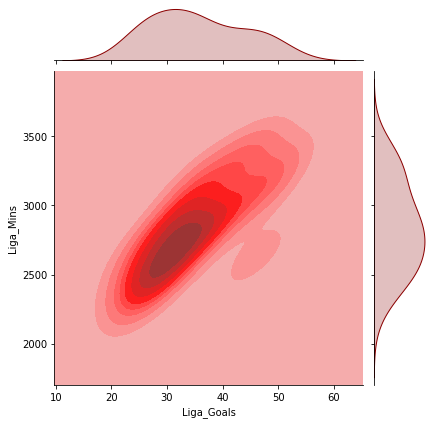

In [ ]:
sns.jointplot("Liga_Goals","Liga_Mins" ,data=ad_data,kind="kde", fill=True, thresh=0, color="darkred")

### Joinplot de distribuição entre gols e minutos em La Liga

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


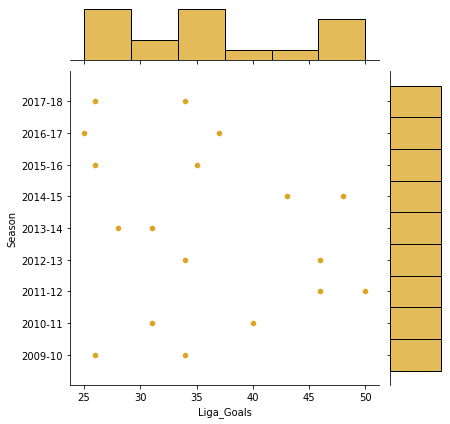

In [ ]:
sns.jointplot("Liga_Goals", "Season", data=ad_data,color="goldenrod")

### Parplot gols em Champions League

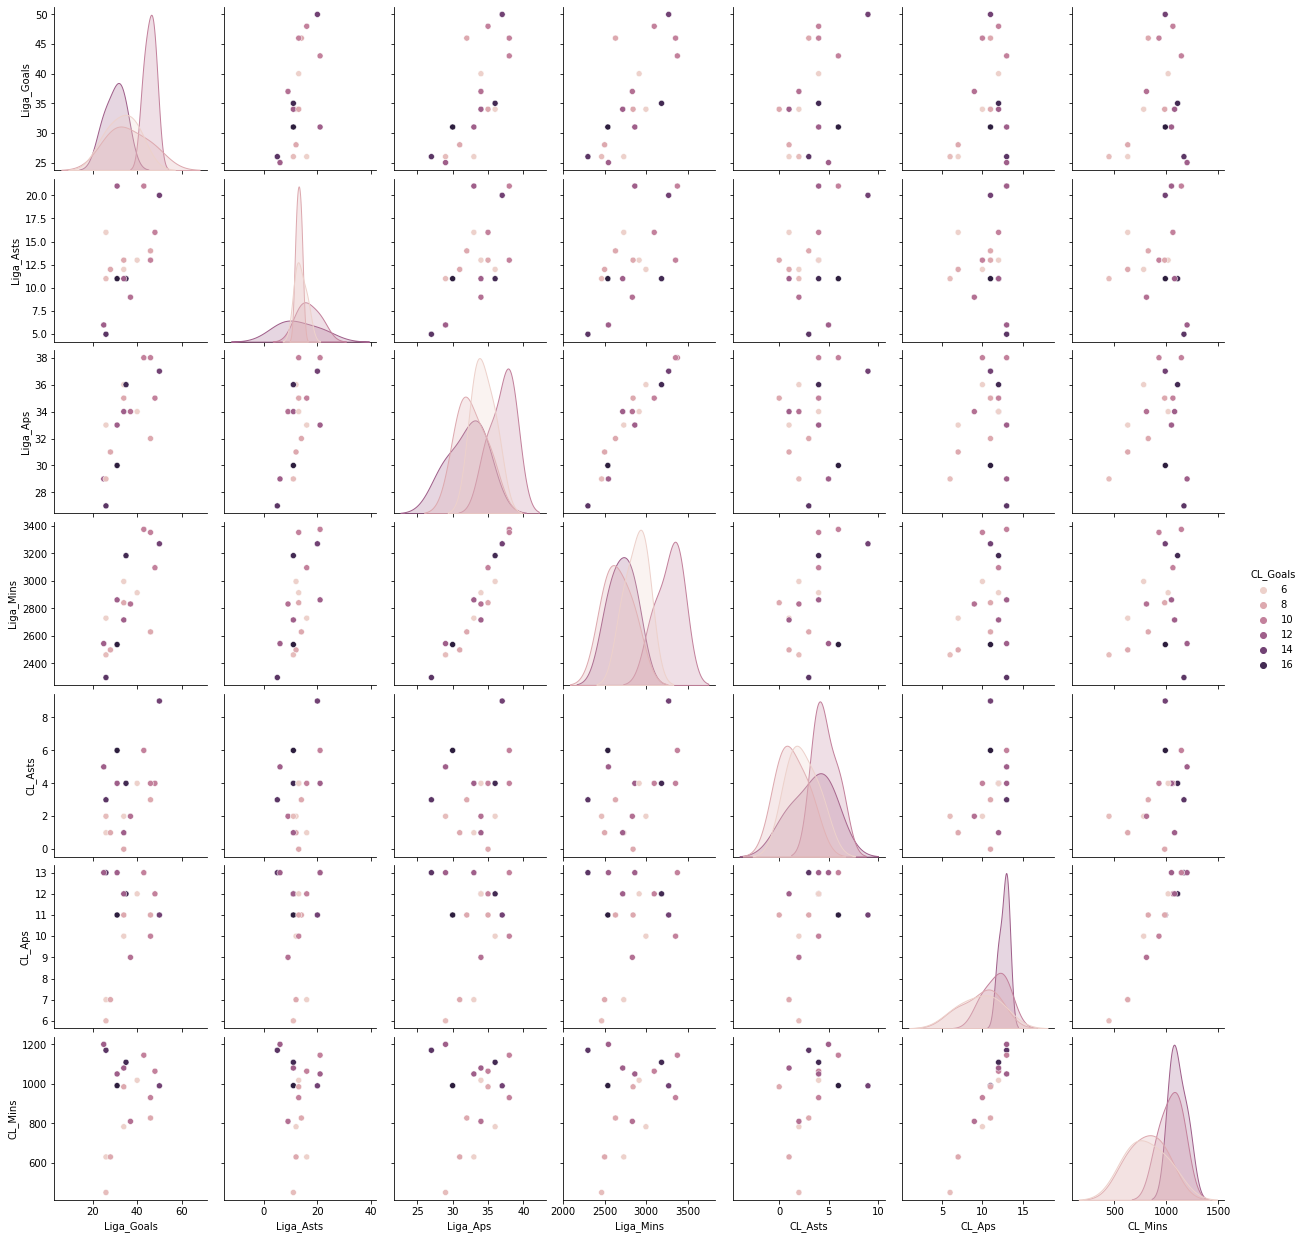

In [ ]:
sns.pairplot(ad_data,hue="CL_Goals")

----

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= ad_data.drop(["Season",	"Player"],axis=1)
y = ad_data["Player"]

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
prediction = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       Messi       1.00      0.50      0.67         2
     Ronaldo       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6

